# Форматы данных (1)

Материалы:
* Макрушин С.В. "Лекция 4: Форматы данных"
* https://docs.python.org/3/library/json.html
* https://docs.python.org/3/library/pickle.html
* https://www.crummy.com/software/BeautifulSoup/bs4/doc.ru/bs4ru.html
* Уэс Маккини. Python и анализ данных

## Задачи для совместного разбора

1. Вывести все адреса электронной почты, содержащиеся в адресной книге `addres-book.json`

2. Вывести телефоны, содержащиеся в адресной книге `addres-book.json`

3. По данным из файла `addres-book-q.xml` сформировать список словарей с телефонами каждого из людей. 

## Лабораторная работа №4

Полезные функции для работы с файловой системой:

os.getcwd() - получение текущего пути

os.chdir() - изменение текущего пути

os.mkdir() - создание новой директории

os.rename() - переименование директории

os.rmdir() - удаление директории

os.walk() - получение содержимого директории

In [120]:
import os
import os.path
from os import listdir
from os.path import isfile, join
cwd2 = os.getcwd()
onlyfiles = [f for f in listdir(cwd) if isfile(join(cwd2, f))]
onlyfiles
cwd=os.getcwd()


# рекурсивный обход дочерних директорий и файлов в них:
#for root, dirs, files in os.walk(cwd):
#    print(f"{root}, dirs: {dirs}, files: {files}")



### JSON

1.1 Считайте файл `contributors_sample.json`. Воспользовавшись модулем `json`, преобразуйте содержимое файла в соответствующие объекты python. Выведите на экран информацию о первых 3 пользователях.

In [84]:
import json
#json.load(data).file.read('contributors_sample.json')
cwd=os.getcwd()
print(cwd)
#os.chdir("..\\3\data")
#cwd=os.getcwd()

with open('contributors_sample.json', 'r') as fp:
        # Чтение файла 'data.json' и преобразование
        # данных JSON в объект Python
        data = json.load(fp)
print(type(data[0]))
def PrintFirstData(source, n):
    for i in range(n):    
        print(f"\n{i+1} пользователь:")
        for a in source[i]:
            print(a, source[i][a], sep=" : ")
        i+=1
PrintFirstData(data, 3)
#print("Второй пользователь:\n",data[1])
#print("Третий пользователь:\n",data[2])


C:\Users\den10\Desktop\Технологии обработки данных\Лабораторные работы\3\data
<class 'dict'>

1 пользователь:
username : uhebert
name : Lindsey Nguyen
sex : F
address : 01261 Cameron Spring
Taylorfurt, AK 97791
mail : jsalazar@gmail.com
jobs : ['Energy engineer', 'Engineer, site', 'Environmental health practitioner', 'Biomedical scientist', 'Jewellery designer']
id : 35193

2 пользователь:
username : vickitaylor
name : Cheryl Lewis
sex : F
address : 66992 Welch Brooks
Marshallshire, ID 56004
mail : bhudson@gmail.com
jobs : ['Music therapist', 'Volunteer coordinator', 'Designer, interior/spatial']
id : 91970

3 пользователь:
username : sheilaadams
name : Julia Allen
sex : F
address : Unit 1632 Box 2971
DPO AE 23297
mail : darren44@yahoo.com
jobs : ['Management consultant', 'Engineer, structural', 'Lecturer, higher education', 'Theatre manager', 'Designer, textile']
id : 1848091


1.2 Выведите уникальные почтовые домены, содержащиеся в почтовых адресах людей

In [89]:
domens=[]#инициализируем пустой список доменов
for user in data:
    s=user['mail']#находим значение в словаре по ключу "mail"
    s=s[s.find("@") + 1:]#срезаем строку по "@" для получения почтового домена
    domens.append(s)
unic_domens= list(set(domens))#находим уникальные значения
print(unic_domens)

['hotmail.com', 'yahoo.com', 'gmail.com']


1.3 Напишите функцию, которая по `username` ищет человека и выводит информацию о нем. Если пользователь с заданным `username` отсутствует, возбудите исключение `ValueError`

In [105]:
def Find(key):
    isnotinDict= True
    for user in data:
        if user["username"] == key:
            isnotinDict= False
            for info in user:
                print(info, user[info], sep=" : ")
            print()
    if  isnotinDict:
        raise ValueError('Такого пользователя в словаре нет!')
            
Find('sheilaadams')
Find('vickitaylor')
Find('111')

username : sheilaadams
name : Julia Allen
sex : F
address : Unit 1632 Box 2971
DPO AE 23297
mail : darren44@yahoo.com
jobs : ['Management consultant', 'Engineer, structural', 'Lecturer, higher education', 'Theatre manager', 'Designer, textile']
id : 1848091

username : vickitaylor
name : Cheryl Lewis
sex : F
address : 66992 Welch Brooks
Marshallshire, ID 56004
mail : bhudson@gmail.com
jobs : ['Music therapist', 'Volunteer coordinator', 'Designer, interior/spatial']
id : 91970



ValueError: Такого пользователя в словаре нет!

1.4 Посчитайте, сколько мужчин и женщин присутсвует в этом наборе данных.

In [110]:
count_male, count_female= 0,0
for user in data:
    if user['sex']== "F":
        count_female+=1
    else:
        count_male+=1
print(f"Мужчин: {count_male}\nЖенщин: {count_female}")

Мужчин: 2064
Женщин: 2136


1.5 Создайте `pd.DataFrame` `contributors`, имеющий столбцы `id`, `username` и `sex`.

In [148]:
import pandas as pd
contributors= pd.DataFrame(data).drop(['name', 'address', 'mail','jobs'], axis=1)[["id","username","sex"]]
contributors
#СТАРОЕ РЕШЕНИЕ
#contributors = pd.DataFrame(data)
#contributors=contributors.drop(['name', 'address', 'mail','jobs'], axis=1)[["id","username","sex"]]
#contributors

,id,username,sex
0,35193,uhebert,F
1,91970,vickitaylor,F
2,1848091,sheilaadams,F
3,50969,nicole82,F
4,676820,jean67,M
...,...,...,...
4195,423555,stevenspencer,F
4196,35251,rwilliams,M
4197,135887,lmartinez,F
4198,212714,brendahill,M


1.6 Загрузите данные из файла `recipes_sample.csv` (__ЛР2__) в таблицу `recipes`. Объедините `recipes` с таблицей `contributors` с сохранением строк в том случае, если информация о человеке отсутствует в JSON-файле. Для скольких человек информация отсутствует? 

In [183]:
#os.chdir(cwd+"\\2\data")
#os.chdir("..")

cwd=os.getcwd()
savecwd= cwd
recipes=pd.read_csv(savecwd+'\\recipes_sample.csv', encoding='ISO-8859–1', parse_dates= ['submitted'])
merged_table= pd.merge(contributors, recipes, left_on= "id", right_on = 'contributor_id', how='right')
merged_table[['id_x']]=merged_table[['id_x']].astype(object)
print(merged_table.info())
merged_table=merged_table.sort_values(by="id_y").set_index("id_y")
table_with_empty_user=merged_table[merged_table['username'].isnull()]
count_empty_user=table_with_empty_user.groupby("contributor_id").count().shape[0]
print(f'для {count_empty_user} человек информация отсутствует')
print('Объединенная таблица представленна ниже:')
merged_table

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id_x            14941 non-null  object        
 1   username        14941 non-null  object        
 2   sex             14941 non-null  object        
 3   name            30000 non-null  object        
 4   id_y            30000 non-null  int64         
 5   minutes         30000 non-null  int64         
 6   contributor_id  30000 non-null  int64         
 7   submitted       30000 non-null  datetime64[ns]
 8   n_steps         18810 non-null  float64       
 9   description     29377 non-null  object        
 10  n_ingredients   21120 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 2.7+ MB
None
для 4204 человек информация отсутствует
Объединенная таблица представленна ниже:


,id_x,username,sex,name,minutes,contributor_id,submitted,n_steps,description,n_ingredients
id_y,,,,,,,,,,
48,1545.0,bushjohn,F,boston cream pie,135,1545,1999-08-24,32.0,NaN,15.0
55,NaN,NaN,NaN,betty crocker s southwestern guacamole dip,125,1538,1999-09-15,NaN,NaN,5.0
66,174711.0,schultzsteven,M,black coffee barbecue sauce,30,174711,1999-09-10,NaN,it's great to know folks like this sauce so mu...,11.0
91,1576.0,ktaylor,M,brown rice and vegetable pilaf,150,1576,1999-09-06,NaN,this is good with almost anything... robb,NaN
94,NaN,NaN,NaN,blueberry buttertarts,40,1556,1999-09-12,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
536547,NaN,NaN,NaN,cauliflower ceviche,45,2002234079,2018-07-30,15.0,a healthy ceviche - a perfect appetizer for pa...,8.0
536610,NaN,NaN,NaN,miracle home made puff pastry,35,2002234259,2018-07-31,17.0,puff pastry that you can make in minutes? at h...,NaN
536728,1052873.0,cookmisty,F,gluten free vegemite,2,1052873,2018-08-11,NaN,gluten free vegemite-like stuff.,3.0


### pickle

2.1 На основе файла `contributors_sample.json` создайте словарь следующего вида: 
```
{
    должность: [список username людей, занимавших эту должность]
}
```

In [233]:
import pickle
from collections import defaultdict
dct = defaultdict(list)
for user in data:
    jobs = user["jobs"]
    username = user["username"]
    for job in jobs:
        dct[job].append(username)
result_dictionary= dict(dct)
result_dictionary

{'Energy engineer': ['uhebert',
  'annmoore',
  'garysilva',
  'martinezashley',
  'sextonsheila',
  'pjames',
  'smithjonathan',
  'wardjames',
  'cwheeler',
  'ucarlson',
  'robert71',
  'johnsontheresa',
  'amanda41',
  'stacey47',
  'timothynelson',
  'timothynelson',
  'rogersmichael',
  'melissa94',
  'wmcdaniel',
  'charles74',
  'smithjennifer',
  'clintonjones'],
 'Engineer, site': ['uhebert',
  'nancy12',
  'andrea03',
  'catherineross',
  'wesley32',
  'natalieross',
  'rossdoris',
  'christophersmith',
  'dbooker',
  'ericarobertson',
  'trantricia',
  'tpugh',
  'jasonvelez',
  'samantha36',
  'brandidaniels',
  'tenglish',
  'reyesbrett',
  'austin18',
  'vjohnson',
  'zmejia',
  'daniel04',
  'cynthia20',
  'morgan15',
  'avaldez',
  'jessica92',
  'laurieholloway',
  'baileyvictoria'],
 'Environmental health practitioner': ['uhebert',
  'jonathanchristian',
  'xjohnson',
  'dsmith',
  'james01',
  'nancytaylor',
  'ztaylor',
  'andrewwoods',
  'susan54',
  'fmaldonado',

2.2 Сохраните результаты в файл `job_people.pickle` и в файл `job_people.json` с использованием форматов pickle и JSON соответственно. Сравните объемы получившихся файлов. При сохранении в JSON укажите аргумент `indent`.

In [247]:
#cwd=os.getcwd()
#cwd
with open('C:\\Users\\den10\\Desktop\\Технологии обработки данных\\Лабораторные работы\\Laboratory-Work\\Лабораторные работы\\3\\job_people.pickle', 'wb') as job_people_out1:
    pickle.dump(result_dictionary, job_people_out1)

with open('C:\\Users\\den10\\Desktop\\Технологии обработки данных\\Лабораторные работы\\Laboratory-Work\\Лабораторные работы\\3\\job_people.json', 'w') as job_people_out2:
    json.dump(result_dictionary, job_people_out2, indent=0)

'C:\\Users\\den10\\Desktop\\Технологии обработки данных\\Лабораторные работы\\2\\data'

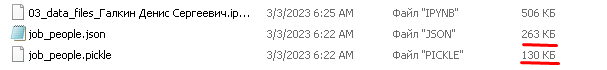

2.3 Считайте файл `job_people.pickle` и продемонстрируйте, что данные считались корректно. 

In [248]:
with open('C:\\Users\\den10\\Desktop\\Технологии обработки данных\\Лабораторные работы\\Laboratory-Work\\Лабораторные работы\\3\\job_people.pickle', 'rb') as f:
    readed_data = pickle.load(f)
print(readed_data)

{'Energy engineer': ['uhebert', 'annmoore', 'garysilva', 'martinezashley', 'sextonsheila', 'pjames', 'smithjonathan', 'wardjames', 'cwheeler', 'ucarlson', 'robert71', 'johnsontheresa', 'amanda41', 'stacey47', 'timothynelson', 'timothynelson', 'rogersmichael', 'melissa94', 'wmcdaniel', 'charles74', 'smithjennifer', 'clintonjones'], 'Engineer, site': ['uhebert', 'nancy12', 'andrea03', 'catherineross', 'wesley32', 'natalieross', 'rossdoris', 'christophersmith', 'dbooker', 'ericarobertson', 'trantricia', 'tpugh', 'jasonvelez', 'samantha36', 'brandidaniels', 'tenglish', 'reyesbrett', 'austin18', 'vjohnson', 'zmejia', 'daniel04', 'cynthia20', 'morgan15', 'avaldez', 'jessica92', 'laurieholloway', 'baileyvictoria'], 'Environmental health practitioner': ['uhebert', 'jonathanchristian', 'xjohnson', 'dsmith', 'james01', 'nancytaylor', 'ztaylor', 'andrewwoods', 'susan54', 'fmaldonado', 'james74', 'bakerjacob', 'stephanie81', 'whitejoseph', 'qolson', 'hknox', 'gonzalesdaniel', 'tranronald', 'jesseg

### XML

3.1 По данным файла `steps_sample.xml` сформируйте словарь с шагами по каждому рецепту вида `{id_рецепта: ["шаг1", "шаг2"]}`. Сохраните этот словарь в файл `steps_sample.json`

In [266]:
#import gzip, pickle
#with gzip.open('C:\\Users\\den10\\Desktop\\Технологии обработки данных\\Лабораторные работы\\Laboratory-Work\\Лабораторные работы\\3\\data\\steps_sample.xml', 'rb') as file:
#    steps= pickle.load(file)
from lxml import objectify
from bs4 import BeautifulSoup
with open('C:\\Users\\den10\\Desktop\\Технологии обработки данных\\Лабораторные работы\\Laboratory-Work\\Лабораторные работы\\3\\data\\steps_sample.xml', 'r') as f:
    table = f.read()
Bs_data = BeautifulSoup(table, "xml")

TypeError: 'NoneType' object is not callable

3.2 По данным файла `steps_sample.xml` сформируйте словарь следующего вида: `кол-во_шагов_в_рецепте: [список_id_рецептов]`

3.3 Получите список рецептов, в этапах выполнения которых есть информация о времени (часы или минуты). Для отбора подходящих рецептов обратите внимание на атрибуты соответствующих тэгов.

3.4 Загрузите данные из файла `recipes_sample.csv` (__ЛР2__) в таблицу `recipes`. Для строк, которые содержат пропуски в столбце `n_steps`, заполните этот столбец на основе файла  `steps_sample.xml`. Строки, в которых столбец `n_steps` заполнен, оставьте без изменений.

3.5 Проверьте, содержит ли столбец `n_steps` пропуски. Если нет, то преобразуйте его к целочисленному типу и сохраните результаты в файл `recipes_sample_with_filled_nsteps.csv`